## Setup Environment

In [ ]:
# Installation of transformers library
! pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import transformers
from transformers import AutoModel, BertTokenizerFast, DistilBertTokenizer, DistilBertForSequenceClassification,BertTokenizer,BertForSequenceClassification
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch.utils as utils
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Set Working Directory 
%cd /content/gdrive/MyDrive/Projects/Project_Tweet



## Load Dataset

  lang                                               text
0   ko  teriana Jacobs 누드 및 포르노 유출! https://t.co/lrzcX...
1   de  RT @catwiesl: @Ricarda_Lang Warum hofiert ihr ...
2   en  RT @fanplus_app: ➖\nGet 10k VTs, Only for 6 da...
3   ja  @ayami_dayoo 残念ながらはずれです…！\n当たるまで毎日挑戦できます！\n当選す...
4   es  Mi Círculo de Interacción de Twitter\n\nGenera...


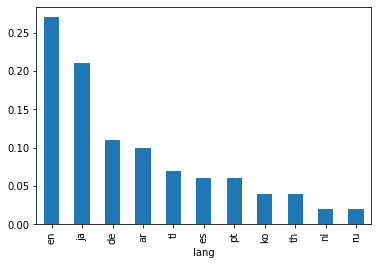

In [ ]:
# visualization of our dataset using barchart
import pandas as pd
df2 = pd.read_csv('final.csv')
print(df2.head())
dfd = df2.groupby(['lang'])['lang'].count()
percentages = dfd.sort_values(ascending=False)/df2.shape[0]
percentages.plot.bar()

'plt.style.use(\'seaborn\')\nlabel_size = [df1.groupby([\'lang\'])[\'lang\'].count()]\n\nplt.pie(label_size,startangle=90,labels= df1["lang"].unique(),autopct=\'%1.1f%%\')\n'

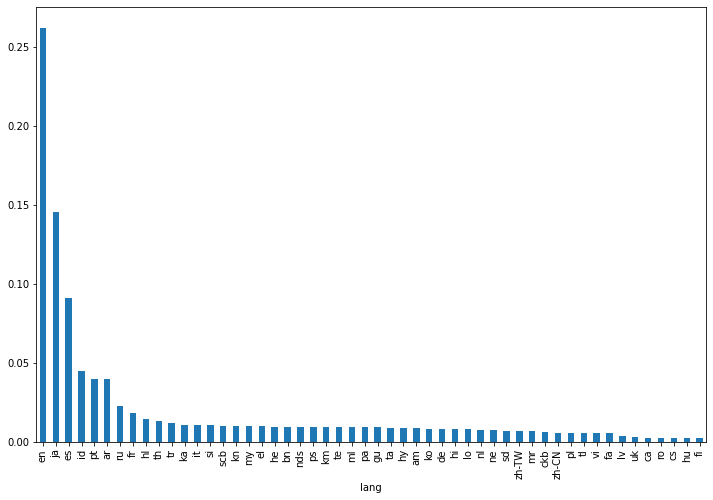

In [ ]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('final.csv') # test.csv for testset and final for our dataset
dfd = df1.groupby(['lang'])['lang'].count()

percentages = dfd.sort_values(ascending=False)/df1.shape[0]
percentages.plot.bar(figsize = (12,8))
plt.savefig("lang.png")
uniform_sampled = df1.groupby(["lang"]).sample(n=10, random_state=2, replace=True) # small for debuggig high for training 
#print(uniform_sampled["lang"].value_counts())
# concatenation to do same onehot encoding on two dataframes

df = pd.concat([uniform_sampled, df2], axis=0)
df_d = df.drop(['id'], axis=1)
#print(df_d.head())
#print(len(uniform_sampled))
# Perform one-hot encoding
df_o = pd.get_dummies(df_d,columns=["lang"])
#print(df_o.columns)
onehot = df_o.iloc[:len(uniform_sampled), :]
onehot_t = df_o.iloc[len(uniform_sampled):, :]
label_train = onehot.drop(["text"], axis=1)
label_test = onehot_t.drop(["text"], axis=1)


# visualization using a piechart 
"""plt.style.use('seaborn')
label_size = [df1.groupby(['lang'])['lang'].count()]

plt.pie(label_size,startangle=90,labels= df1["lang"].unique(),autopct='%1.1f%%')
"""

48239
5139
7
2132        ar
2132        ar
2132        ar
1614        ar
2132        ar
1614        ar
3331        ar
5179       ckb
5179       ckb
5179       ckb
5179       ckb
5179       ckb
5179       ckb
5179       ckb
5179       ckb
5179       ckb
5179       ckb
54229       ja
55492       ja
47270       ja
47270       ja
55132       ja
55132       ja
51877       ja
51685       ja
47754       ja
58534       ka
58534       ka
58534       ka
58294       ka
58294       ka
58534       ka
58294       ka
58294       ka
60600       ko
60779       ko
60449       ko
60449       ko
60600       ko
60600       ko
60449       ko
60449       ko
60449       ko
60449       ko
60600       ko
60779       ko
60779       ko
60779       ko
60600       ko
60779       ko
60779       ko
60449       ko
60600       ko
7335        en
13550       hi
16171       hu
23175       ko
30212       ne
40134       sd
47047    zh-CN
Name: lang, dtype: object


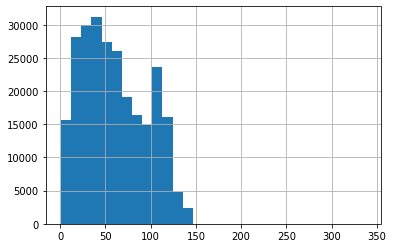

In [ ]:
# we check the distribution of the length of our training data 
df["len"] = df['text'].map(lambda x: len(x))
df["len"].hist(bins=30)
print(df["len"][df["len"]>100].count())
print(df["len"][df["len"]>128].count())
print(df["len"][df["len"]>140].count())
print(df["lang"][df["len"]<2])

In [ ]:
# we check the language distribution of our data 
print(df1["lang"].value_counts())

en       21156
ja       11719
es        7345
id        3622
pt        3199
ar        3182
ru        1841
fr        1448
hl        1142
th        1037
tr         947
ka         846
it         831
si         827
scb        812
kn         797
my         787
el         777
he         770
bn         767
nds        766
ps         759
km         752
te         751
ml         743
pa         741
gu         731
ta         700
hy         696
am         678
ko         666
de         656
hi         649
lo         625
nl         605
ne         587
sd         556
zh-TW      538
mr         525
ckb        517
zh-CN      461
pl         441
tl         441
vi         429
fa         419
lv         290
uk         214
ca         209
ro         185
cs         172
hu         165
fi         165
Name: lang, dtype: int64


In [ ]:
# over and undersampling


## Train-test-split

In [ ]:
# Train-Validation-split


train_text, val_text, train_labels, val_labels = train_test_split(onehot["text"], label_train, 
                                                                    random_state=12, 
                                                                    test_size=0.1, 
                                                                    stratify=label_train)

test_text, test_labels = (onehot_t["text"], label_test)



relative_freq = []
for c in train_labels.columns:
  relative_freq.append(1/(1000*(train_labels[c].sum()/len(train_labels))))

print(relative_freq)



# testing whether the sampling is truly random 


[0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.05199999999999999, 0.0519999999

In [ ]:

#print(test_labels.iloc[:, : 10].head(10))

['ALBERT_PRETRAINED_CONFIG_ARCHIVE_MAP', 'ALBERT_PRETRAINED_MODEL_ARCHIVE_LIST', 'ALL_PRETRAINED_CONFIG_ARCHIVE_MAP', 'ALTCLIP_PRETRAINED_CONFIG_ARCHIVE_MAP', 'ALTCLIP_PRETRAINED_MODEL_ARCHIVE_LIST', 'ASTConfig', 'ASTFeatureExtractor', 'ASTForAudioClassification', 'ASTModel', 'ASTPreTrainedModel', 'AUDIO_SPECTROGRAM_TRANSFORMER_PRETRAINED_CONFIG_ARCHIVE_MAP', 'AUDIO_SPECTROGRAM_TRANSFORMER_PRETRAINED_MODEL_ARCHIVE_LIST', 'Adafactor', 'AdamW', 'AdamWeightDecay', 'AdaptiveEmbedding', 'AddedToken', 'AlbertConfig', 'AlbertForMaskedLM', 'AlbertForMultipleChoice', 'AlbertForPreTraining', 'AlbertForQuestionAnswering', 'AlbertForSequenceClassification', 'AlbertForTokenClassification', 'AlbertModel', 'AlbertPreTrainedModel', 'AlbertTokenizer', 'AlbertTokenizerFast', 'AltCLIPConfig', 'AltCLIPModel', 'AltCLIPPreTrainedModel', 'AltCLIPProcessor', 'AltCLIPTextConfig', 'AltCLIPTextModel', 'AltCLIPVisionConfig', 'AltCLIPVisionModel', 'AudioClassificationPipeline', 'AutoBackbone', 'AutoConfig', 'AutoF

## Distilbert Fine-tuning

### Load pretrained bert Model


In [ ]:
# Load pretrained BERT model and tokenizer 
from transformers import AutoTokenizer
model_name ='bert-base-multilingual-uncased' # or 'roberta-base' or 'xlm-roberta-base' or 'cardiffnlp/twitter-xlm-roberta-base' 
bert = AutoModel.from_pretrained(model_name,output_hidden_states=True) # for bert model 
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased') #  DistilBertTokenizer bert-base-multilingual-uncased

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(bert.modules)

<bound method Module.modules of XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0): XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05

### Analysis of word distribution in training data

Text(0, 0.5, 'Number of tweets')

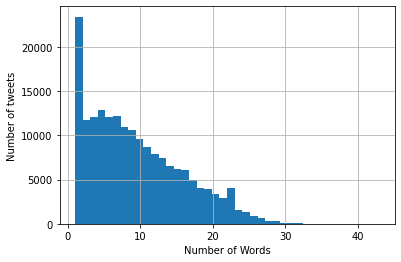

In [ ]:
# visualiation of the 
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40)
plt.xlabel('Number of Words')
plt.ylabel('Number of tweets')

'from torch.nn.utils.rnn import pad_sequence\n\ninput_text = ["text sequence 1", "text sequence 2"]\n\n# Tokenize the input text\ntokenized_text = [tokenizer.tokenize(text) for text in input_text]\n\n# Convert the tokenized text to numerical representation\ninput_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_text]\n\n# Pad the sequences to a specified max length\npadded_input_ids = pad_sequence(torch.tensor(input_ids), batch_first=True, padding_value=tokenizer.pad_token_id)'

In [ ]:
# maxlength of 25 seems reasonable according to the prior visualization
MAX_LENGHT = 25
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    padding='max_length',
    add_special_tokens=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    padding='max_length',
    add_special_tokens=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    add_special_tokens=True,
    padding='max_length',
    truncation=True
)

In [ ]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.values)

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.values)

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.values)

In [ ]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 64                                               

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                           
val_data = TensorDataset(val_seq, val_mask, val_y)            
val_sampler = SequentialSampler(val_data)                    
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                            

### Freeze Layers

In [ ]:
# Freezing the parameters 
# We also tried to train the last pooler layer but did not gain a significiant performance boost
"""for name, param in bert.named_parameters():
    if 'pooler' not in name:
        param.requires_grad = False"""

for param in bert.parameters():
    param.requires_grad = False 
      # false -> no gradient"""

In [ ]:
#bert.classifier = nn.Linear(768,52)
#temp = nn.Linear(768,52)
number_trainparam = sum(p.numel() for p in bert.parameters() if p.requires_grad) # check if we only train the layers we want to train
print(number_trainparam)

0


### Definition Model Architecture

In [ ]:

class BERT_Arch(nn.Module):
    def __init__(self, bert):  
      super(BERT_Arch, self).__init__()
      self.bert = bert   
      self.dropout = nn.Dropout(0.1)           
      self.relu =  nn.ReLU()                    
      self.fc1 = nn.Linear(768,128)          
      self.fc2 = nn.Linear(128,52)               # dense layer 2 (Output layer)
           
    def forward(self, sent_id, mask):           
      
      cls_hs = self.bert(sent_id, attention_mask=mask)
      
      # we take the mean over all the last hidden states                                         
      x = self.fc1(torch.mean(cls_hs.last_hidden_state,1))
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)     # no softmax is required since the binary cross entropy loss already incorporates softmax                       
                             
      return x


model = BERT_Arch(bert).to(device=device) # send model to device

# Define the loss function
# weight = torch.tensor(relative_freq)
cross_entropy  = nn.CrossEntropyLoss().to(device=device)

# Defining the optimizer

from transformers import AdamW
optimizer = AdamW(model.parameters(),lr = 3e-4)          # learning rate
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# Number of training epochs
epochs = 10



/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Definition of training and eval


In [ ]:
# Defining training and evaluation functions
def train():  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  
    sent_id, mask, labels = batch 
    
    sent_id = sent_id.to(device=device) # send all elements on the gpu 
    mask = mask.to(device=device) 
                                              
    preds = model(sent_id, mask)
    

   


    # get model predictions for current batch
    optimizer.zero_grad() 
    labels = labels.float().to(device=device)
    loss = cross_entropy(preds, labels)
      
                       
    total_loss = total_loss + loss.item()                       # add up loss
    loss.backward()                                             # calculate the gradients
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions stored on GPU-> CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch  
                                                               
  return avg_loss                                 # returns the loss and predictions

def evaluate():  
  print("\nEvaluation...")  
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0  
  for step,batch in enumerate(val_dataloader):    # Iterate over batches  
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.     
                                                
                                                
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                 
    batch = [t for t in batch]                    
    sent_id, mask, labels = batch
    with torch.no_grad():   
      sent_id = sent_id.to(device=device)
      mask = sent_id.to(device=device)  
      labels = labels.float().to(device=device)

      preds = model(sent_id, mask)  
              
      loss = cross_entropy(preds,labels )                      
      """preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels.long())    """     
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # the validation loss of the epoch
  return avg_loss

### Model training

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))     
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'cmtds_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)
    scheduler.step()
    
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}') # was sometimes nan for some reasons this problem did not occur with distilbert 
    #but since other models were not required we decided to add this too we used them later for our ensemble classifier


 Epoch 1 / 10
  Batch    50  of  3,088.
  Batch   100  of  3,088.
  Batch   150  of  3,088.
  Batch   200  of  3,088.
  Batch   250  of  3,088.
  Batch   300  of  3,088.
  Batch   350  of  3,088.
  Batch   400  of  3,088.
  Batch   450  of  3,088.
  Batch   500  of  3,088.
  Batch   550  of  3,088.
  Batch   600  of  3,088.
  Batch   650  of  3,088.
  Batch   700  of  3,088.
  Batch   750  of  3,088.
  Batch   800  of  3,088.
  Batch   850  of  3,088.
  Batch   900  of  3,088.
  Batch   950  of  3,088.
  Batch 1,000  of  3,088.
  Batch 1,050  of  3,088.
  Batch 1,100  of  3,088.
  Batch 1,150  of  3,088.
  Batch 1,200  of  3,088.
  Batch 1,250  of  3,088.
  Batch 1,300  of  3,088.
  Batch 1,350  of  3,088.
  Batch 1,400  of  3,088.
  Batch 1,450  of  3,088.
  Batch 1,500  of  3,088.
  Batch 1,550  of  3,088.
  Batch 1,600  of  3,088.
  Batch 1,650  of  3,088.
  Batch 1,700  of  3,088.
  Batch 1,750  of  3,088.
  Batch 1,800  of  3,088.
  Batch 1,850  of  3,088.
  Batch 1,900  of  3,08

### Model performance

In [ ]:
path = '{}_weights.pt'.format(model_name)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
batch_size = 64

preds = []
predictions = []
for i in range(0, len(test_seq), batch_size):
    batch_seq = test_seq[i:i + batch_size]
    batch_mask = test_mask[i:i + batch_size]
    batch_labels = test_y[i:i + batch_size]
    with torch.no_grad():
        batch_seq = batch_seq.to(device=device)
        batch_mask = batch_mask.to(device=device)
        output = model(batch_seq, batch_mask).detach().cpu().numpy()
        
       
        # we take the index of the highest value which represents our class 1-52
        # the tensor has size [batchsize (32), number of words in sentence (currently 20), class probabilities(52 of them) ]
        predicted = np.argmax(output, axis=-1)
       
        #predictions.append(predicted)
        # each tokenized word has one class it belongs most likely to (an int between 1-52) we take all the values and assign the class label of the sentence to the 
        # class that was predicted most often  
        for j in range(predicted.shape[0]): # 32 times (for each element in batch size )
            value = predicted[j]
            # we append the class to our predictions 
            predictions.append(value)
            
        
        
        
        
      
        

preds = np.array(predictions)
# the argmax of the onehot encoding gives an int 1-52
maxs = np.argmax(test_y, axis=1)
# save the predictions in a dataframe for comparison between the models 
pandas_p = pd.DataFrame(preds, columns=["prediction"])
pandas_l = pd.DataFrame(maxs, columns=["labels"])
pd.DataFrame(pd.concat([pandas_p, pandas_l], axis=1)).to_csv("{}our.csv".format(model_name))


0.79
0.40579710144927533
0.79
0.8405978858115081


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


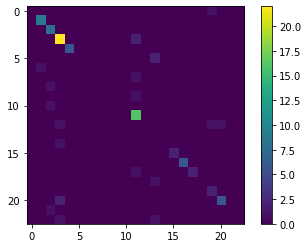

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score
# this shows an old confusion matrix of the bert model our dataset
confusion = confusion_matrix(preds, maxs)
plt.imshow(confusion)
plt.colorbar()
print(accuracy_score(maxs,preds))
print(precision_score(maxs,preds, average='macro'))
print(recall_score(maxs,preds, average='macro'))
print(f1_score(maxs,preds, average='weighted'))


0.6903826871657754
0.6459670903014009
0.6869500826984255
0.654350193539542


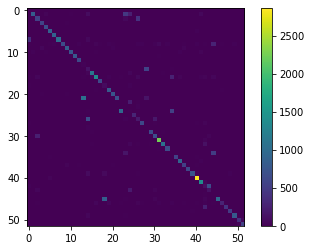

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score
# here are the results of a prior run with bert only trained on english data es expected the accuracy is significantly lower
confusion = confusion_matrix(preds, maxs)
plt.imshow(confusion)
plt.colorbar()
print(accuracy_score(maxs,preds))
print(precision_score(maxs,preds, average='macro'))
print(recall_score(maxs,preds, average='macro'))
print(f1_score(maxs,preds, average='weighted'))


ROBERTA 

In [ ]:
torch.save(model.state_dict(), '{}1_weights.pt'.format(model_name))